<a href="https://colab.research.google.com/github/magrathealabs/university/blob/master/digital-image-processing/class1_DIP_introduction_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolução dos exercícios da aula 1

## Bibliotecas

In [0]:
!pip3 install opencv-python 
!pip3 install matplotlib   cada
import urllib.request
import cv2
import numpy as np         
import pandas as pd        
import matplotlib.pyplot as plt

In [0]:
def read_image_from_drive(url, type):
  resp = urllib.request.urlopen(url)
  img_byte = np.asarray(bytearray(resp.read()), dtype="uint8")
  if type == 0:
    return cv2.imdecode(img_byte, cv2.IMREAD_GRAYSCALE)
  else:
    img = cv2.imdecode(img_byte, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

def plot_images_inline(imgs):
  fig = plt.figure()
  for n, img in enumerate(imgs):
      fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
      plt.imshow(img, cmap='gray')

  fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
  plt.show()

#### Exercício #1
  - Lendo imagens:
    - Ler esta imagem: https://docs.google.com/uc?export=download&id=17IsJJCMyaOoyARItuzWp1_MddX1ty3AW
    - Apresenta-la na tela
    - Separar em três canais
    - E apresenta-los na tela
  

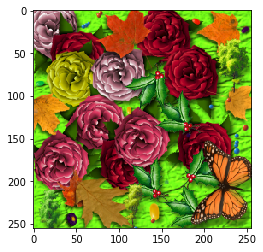

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=17IsJJCMyaOoyARItuzWp1_MddX1ty3AW', 1)

plt.imshow(img)

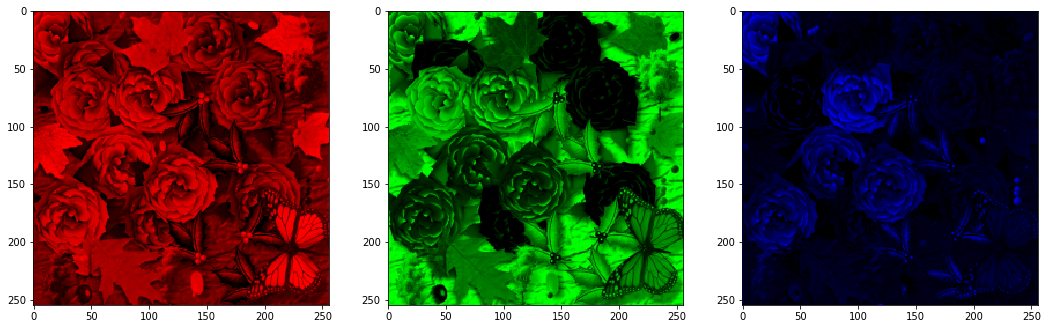

In [0]:
red = img.copy()
red[:, :, 1] = 0
red[:, :, 2] = 0

green = img.copy()
green[:, :, 0] = 0
green[:, :, 2] = 0

blue = img.copy()
blue[:, :, 0] = 0
blue[:, :, 1] = 0

imgs = [red, green, blue]

plot_images_inline(imgs)

#### Exercício #2
  - Processamento morfologico:
    - Ler esta imagem: https://docs.google.com/uc?export=download&id=13YGya60ELhQjYNVDMsUyN2IAfLxWkluf
    - Remover as estrelas do céu
    - E apresenta-la na tela
  

<br>
<center><img width="300" alt="fronteira" src="https://docs.google.com/uc?export=download&id=13YGya60ELhQjYNVDMsUyN2IAfLxWkluf"></center>

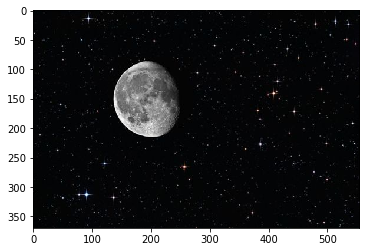

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=13YGya60ELhQjYNVDMsUyN2IAfLxWkluf', 1)

plt.imshow(img)

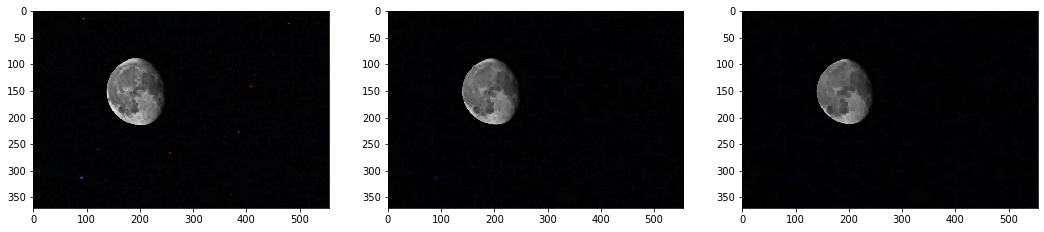

In [0]:
kernel = np.ones((3,3), np.uint8) 

img_erosion_1 = cv2.erode(img, kernel, iterations=1) 
img_erosion_2 = cv2.erode(img, kernel, iterations=2) 
img_erosion_3 = cv2.erode(img, kernel, iterations=3) 

imgs = [img_erosion_1, img_erosion_2, img_erosion_3]

plot_images_inline(imgs)

#### Exercício #3 - Detecção de bordas
  - Neste exercício, vamos utilizar a mesma imagem anterior. Porém, ao invés de utilizar a técnica Canny para detecção de bordas, vamos utlizar [`Laplacian`](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6) e [`Sobel`](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

  - Para ler a imagem utilize:
```
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1AQnsvwckAAS4ILKBFbARXFtmlWf6B19P', 0)
```


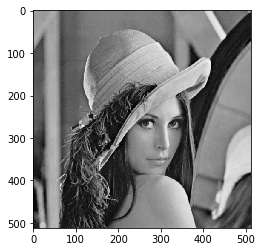

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1AQnsvwckAAS4ILKBFbARXFtmlWf6B19P', 0)

plt.imshow(img, cmap='gray')

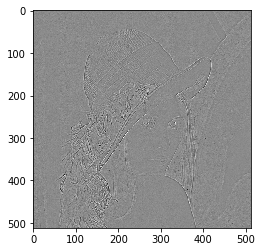

In [0]:
img_laplacian = cv2.Laplacian(img, cv2.CV_64F)

plt.imshow(img_laplacian, cmap='gray')

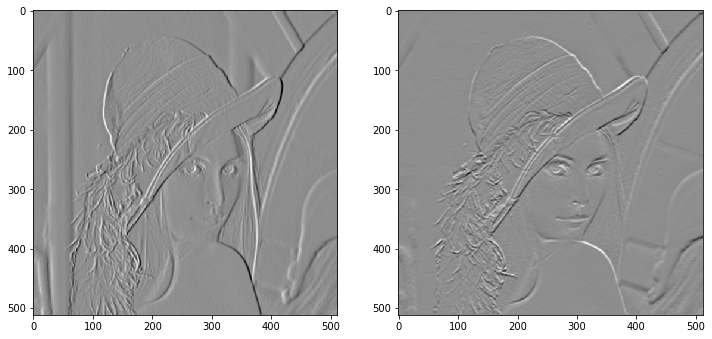

In [0]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) 
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  

plot_images_inline([sobelx, sobely])

#### Exercício #4
  - Aplicar limiarização em uma imagem na seguinte imagem: https://drive.google.com/open?id=1Udx0GgobkTd_1pSPiP5iM6UVUhFn22kg

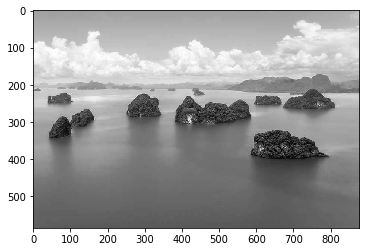

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1Udx0GgobkTd_1pSPiP5iM6UVUhFn22kg', 0)

plt.imshow(img, cmap='gray')

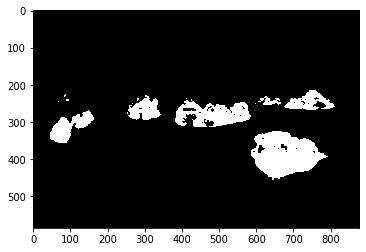

In [0]:
blur = cv2.blur(img, (5, 5))
th, thresh = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap='gray')

#### Execício #5
  - Contar o número de modedas na imagem abaixo
  <br><img width="300" alt="segmentacao" src="https://docs.google.com/uc?export=download&id=1i7_74X-D--jcM0UBR3yVrZzfckZILSGq">
<br>
  - Lembrem sempre de ler a documentaçao e entender os parâmetros das funções que estam utilizando

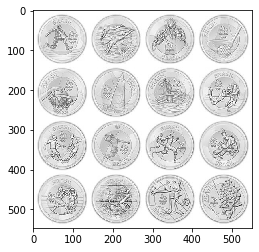

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1i7_74X-D--jcM0UBR3yVrZzfckZILSGq', 0)

plt.imshow(img, cmap='gray')

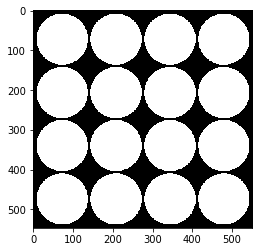

In [0]:
blur = cv2.blur(img,(5,5))
ret, thresh = cv2.threshold(blur, 250, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

Abaixo, apenas estamos utilizando outra maneira de criar o kernel [`getStructuringElement`](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc)

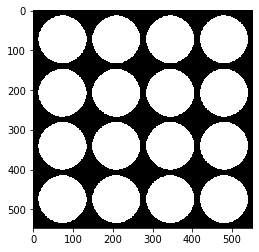

In [0]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(8,8))
thresh_dilated = cv2.erode(thresh, kernel)

plt.imshow(thresh_dilated, cmap='gray')

In [0]:
img, contours, h = cv2.findContours(thresh_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

len(contours)

16

#### Exercício #6
  - Identificando objetos apenas pelas distância entre pixels
<br>
<center><img width="500" alt="segmentacao" src="https://docs.google.com/uc?export=download&id=1VlCDQlEkOagL267wApywy8fQHtizJ78z"></center>
<br>

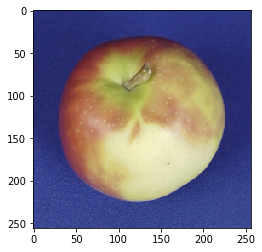

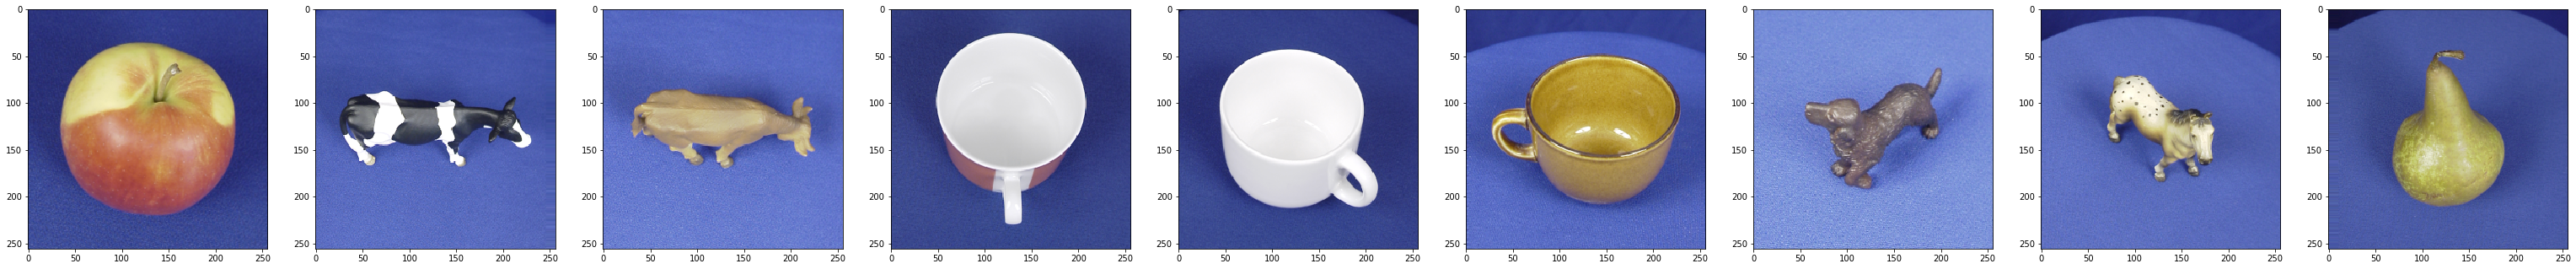

In [0]:
probe = read_image_from_drive('https://docs.google.com/uc?export=download&id=17c1CIT_9cS14fuGuoNEBHL3jCW84KwfP', 1)

img1 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1dr3iiwFy6Ro6jvEWmRpB8xXXFGbb2OSN', 1)
img2 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1KV9AKgTAASqsAK3DAtZ2IhdSkpsD5Txt', 1)
img3 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1W4HU3-9MPUfMCCNjbiOeJUMTJvGbM3Zi', 1)
img4 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1Jfko06ALMjhFzwlGmoq1ChlHznkms4jN', 1)
img5 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1K_hBaBOrphT6otT2ZrvQarcDUTLNJuM4', 1)
img6 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1YxwrMRZnYl31yRjymHqnF92PY0xsnXBZ', 1)
img7 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1oy5FGNmFfEn5umj3C48fhhvUF5zN-ofn', 1)
img8 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1ZNhbHMKZmN2qihgDM1qZ_X311ICDrVQP', 1)
img9 = read_image_from_drive('https://docs.google.com/uc?export=download&id=10pFckX57Y-ZP4Dma7MTElemuXYfyboY9', 1)

plt.imshow(probe)

obj_imgs = [img1, img2, img3, img4, img5, img6, img7, img8, img9]

plot_images_inline(obj_imgs)

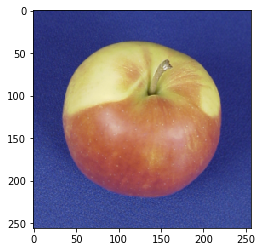

In [0]:
min_dist = float('inf')
norms = []

for img in obj_imgs:
    dist = cv2.norm(img, probe, cv2.NORM_L2)
    norms.append(dist)
    if dist < min_dist:
        min_dist = dist
        img_found = img

plt.imshow(img_found)

#### Exercício #7
  - [HaarCascade](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html):
    - Os detectores baseados em cascade (cascata) são chamados assim pois treinam uma árvore de decisão em que cada nível analisa um conjunto de atributos diferentes e avalia se esses atributos representam ou não o objeto de interesse.
 
    <br>
    <center><img width="200" alt="segmentacao" src="https://docs.google.com/uc?export=download&id=1XSkFk9h3adPFoorJqNwUuqTgDKlzsGud">
<br>

  - Para este exercício use a seguinte imagem:
    - https://docs.google.com/uc?export=download&id=1qahuwI8qRZ7_DJBeLN6QrTLJOwgvY-Sl


--2019-11-02 14:40:09--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘drive/gaze/haarcascade_eye.xml.3’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.03s   

2019-11-02 14:40:09 (11.6 MB/s) - ‘drive/gaze/haarcascade_eye.xml.3’ saved [341406/341406]

--2019-11-02 14:40:10--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP r

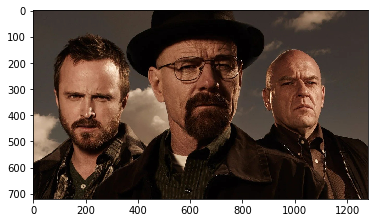

In [0]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P drive/gaze
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P drive/gaze
cascades_path = 'drive/gaze/'

face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_eye.xml')

img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1qahuwI8qRZ7_DJBeLN6QrTLJOwgvY-Sl', 1)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

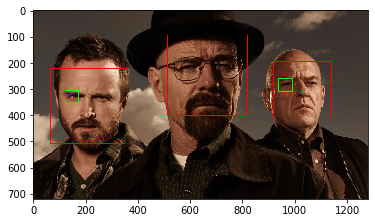

In [0]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)